<a href="https://colab.research.google.com/github/Gabrielnkl/notebooks/blob/main/classification_Crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("madhuraatmarambhagat/crop-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/crop-recommendation-dataset


In [2]:
import pandas as pd

# Load CSV
df = pd.read_csv(f'{path}/Crop_recommendation.csv')
print(df.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop('label', axis=1)
y = df['label']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [7]:
len(encoder.classes_)

22

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1045 - loss: 14.3218 - val_accuracy: 0.2455 - val_loss: 2.8417
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4182 - loss: 2.0640 - val_accuracy: 0.6727 - val_loss: 1.1499
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7218 - loss: 0.9420 - val_accuracy: 0.7932 - val_loss: 0.7357
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8179 - loss: 0.5874 - val_accuracy: 0.8045 - val_loss: 0.5719
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8419 - loss: 0.4713 - val_accuracy: 0.8341 - val_loss: 0.5248
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8957 - loss: 0.3673 - val_accuracy: 0.8500 - val_loss: 0.4196
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9244 - loss: 0.2950 - val_accuracy: 0.8864 - val_loss: 0.3507
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9334 - loss: 0.2432 - val_accuracy: 0.8636 - val_loss: 0.3237
Ep

In [11]:
model.evaluate(X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9048 - loss: 0.2966 


[0.2966251075267792, 0.8999999761581421]

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


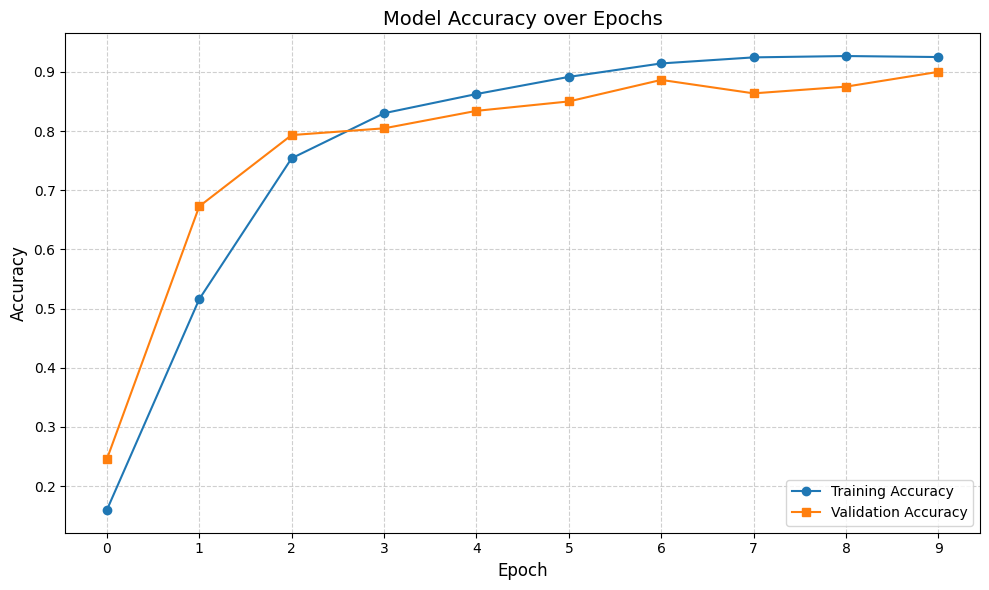

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(len(history.history['accuracy'])))
plt.tight_layout()
plt.show()

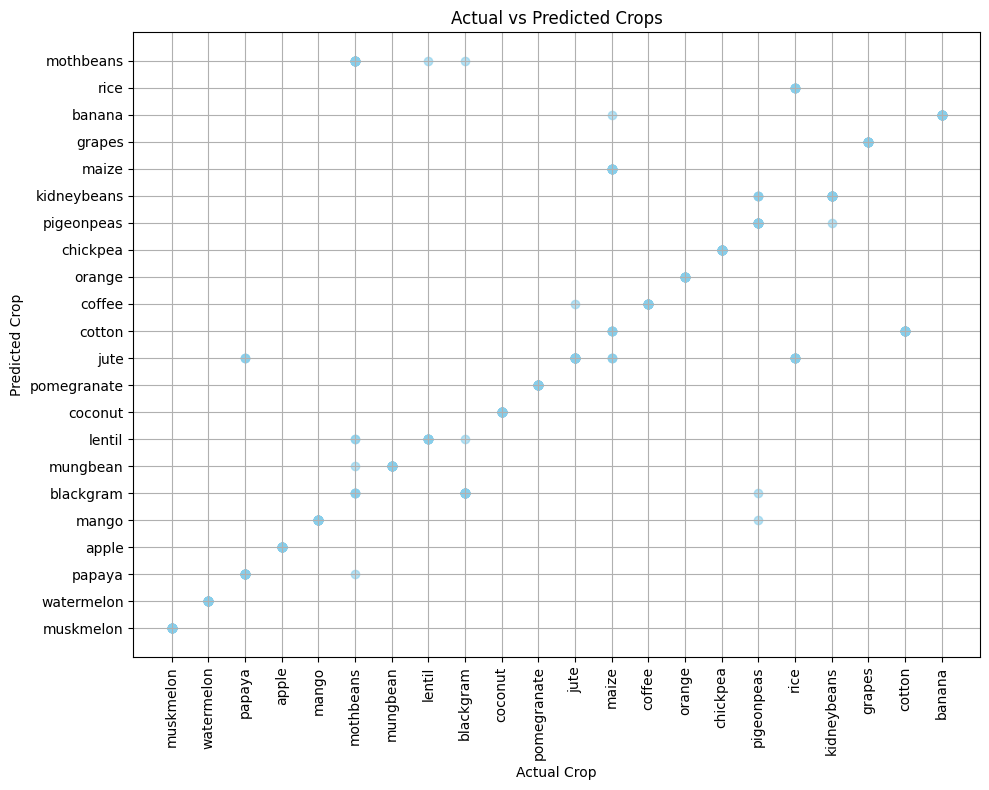

In [24]:
import numpy as np

# Convert back to crop names
actual_crops = encoder.inverse_transform(y_test)
predicted_crops = encoder.inverse_transform(y_pred.argmax(axis=1))

# Create a figure
plt.figure(figsize=(10, 8))

# Scatter plot
for actual, predicted_label in zip(actual_crops, predicted_crops):
    plt.scatter(actual, predicted_label, alpha=0.6, color='skyblue')

# Labels
plt.xlabel("Actual Crop")
plt.ylabel("Predicted Crop")
plt.title("Actual vs Predicted Crops")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()
